This code takes the reprojected carbon stock layers and calculates zonal statistics across the y2y region based on ecoregion and landcover attributes, among others.

In [1]:
# import packages
import geopandas as gpd
import numpy as np
import rioxarray
import xarray

from geocube.api.core import make_geocube

In [31]:
# load 2017 ecoregions clipped to y2y and reproject to match rasters
eco = gpd.read_file('./land_cover/ecoregions2017_clipped.shp').to_crs('+proj=laea +lat_0=55 +lon_0=-125 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
eco

,OBJECTID,ECO_NAME,BIOME_NUM,BIOME_NAME,REALM,ECO_BIOME_,NNH,ECO_ID,SHAPE_LENG,SHAPE_AREA,NNH_NAME,COLOR,COLOR_BIO,COLOR_NNH,LICENSE,geometry
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,345,62.333821,17.133639,Nature Could Reach Half Protected,#5DAD4C,#458970,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((231107.227 305009.454, 226734...."
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,Nearctic,NE05,3,348,22.624165,8.066966,Nature Could Recover,#35A85A,#458970,#F9A91B,CC-BY 4.0,"POLYGON ((614252.395 -1139094.041, 612099.656 ..."
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,349,86.917940,14.653986,Nature Could Reach Half Protected,#00A884,#458970,#7BC141,CC-BY 4.0,"POLYGON ((-166421.245 37682.88, -177859.583 32..."
3,84.0,Brooks-British Range tundra,11.0,Tundra,Nearctic,NE11,1,411,87.112754,34.783625,Half Protected,#66BECA,#9ED7C2,#257339,CC-BY 4.0,"MULTIPOLYGON (((-514179.871 1392834.151, -5147..."
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands",Nearctic,NE08,4,386,86.836978,40.677412,Nature Imperiled,#DB931A,#FEFF73,#EE1E23,CC-BY 4.0,"MULTIPOLYGON (((725180.479 -339910.34, 723716...."
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,Nearctic,NE05,2,350,36.323846,19.868732,Nature Could Reach Half Protected,#4CD970,#458970,#7BC141,CC-BY 4.0,"POLYGON ((192654.361 -120678.524, 194329.256 -..."
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,Nearctic,NE05,3,355,26.796172,13.925479,Nature Could Recover,#5ABD7A,#458970,#F9A91B,CC-BY 4.0,"POLYGON ((298504.267 -341027.666, 298711.41 -3..."
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,Nearctic,NE06,2,375,199.626313,80.342543,Nature Could Reach Half Protected,#6D3EC2,#7AB6F5,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((-627905.705 1421020.585, -6225..."
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,Nearctic,NE11,2,416,121.006872,29.065154,Nature Could Reach Half Protected,#6EE3C6,#9ED7C2,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((-713662.418 1111909.509, -7138..."
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,Nearctic,NE06,2,376,109.724632,79.516771,Nature Could Reach Half Protected,#DCB1F9,#7AB6F5,#7BC141,CC-BY 4.0,"MULTIPOLYGON (((253378.224 142341.081, 266856...."


In [32]:
# filter by columns needed
eco = eco.filter(['OBJECTID', 'ECO_NAME', 'BIOME_NUM', 'BIOME_NAME', 'geometry'])
eco

,OBJECTID,ECO_NAME,BIOME_NUM,BIOME_NAME,geometry
0,13.0,Alberta-British Columbia foothills forests,5.0,Temperate Conifer Forests,"MULTIPOLYGON (((231107.227 305009.454, 226734...."
1,74.0,Blue Mountains forests,5.0,Temperate Conifer Forests,"POLYGON ((614252.395 -1139094.041, 612099.656 ..."
2,83.0,British Columbia coastal conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((-166421.245 37682.88, -177859.583 32..."
3,84.0,Brooks-British Range tundra,11.0,Tundra,"MULTIPOLYGON (((-514179.871 1392834.151, -5147..."
4,95.0,Canadian Aspen forests and parklands,8.0,"Temperate Grasslands, Savannas & Shrublands","MULTIPOLYGON (((725180.479 -339910.34, 723716...."
5,133.0,Central British Columbia Mountain forests,5.0,Temperate Conifer Forests,"POLYGON ((192654.361 -120678.524, 194329.256 -..."
6,272.0,Fraser Plateau and Basin conifer forests,5.0,Temperate Conifer Forests,"POLYGON ((298504.267 -341027.666, 298711.41 -3..."
7,337.0,Interior Alaska-Yukon lowland taiga,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((-627905.705 1421020.585, -6225..."
8,339.0,Interior Yukon-Alaska alpine tundra,11.0,Tundra,"MULTIPOLYGON (((-713662.418 1111909.509, -7138..."
9,438.0,Mid-Canada Boreal Plains forests,6.0,Boreal Forests/Taiga,"MULTIPOLYGON (((253378.224 142341.081, 266856...."


In [33]:
# load aboveground biomass in tonnes
agb_t = rioxarray.open_rasterio(
    './carbon_stock_data/output_layers/agb_c_spawn_t_laea.tif', masked=True
).rio.clip(
    eco.geometry.values, eco.crs, from_disk=True)
agb_t.name = "agb_t"

In [43]:
# create output grid
out_grid = make_geocube(
    vector_data=eco,
    measurements=['OBJECTID'],
    like=agb_t
)

In [44]:
# merge the two together
out_grid['agb_t'] = (agb_t.dims, agb_t.values, agb_t.attrs, agb_t.encoding)
out_grid

<xarray.Dataset> Size: 2GB
Dimensions:      (y: 11122, x: 8514, band: 1)
Coordinates:
  * y            (y) float64 89kB 1.429e+06 1.428e+06 ... -1.351e+06 -1.352e+06
  * x            (x) float64 68kB -7.585e+05 -7.582e+05 ... 1.37e+06 1.37e+06
    spatial_ref  int64 8B 0
Dimensions without coordinates: band
Data variables:
    OBJECTID     (y, x) float64 758MB nan nan nan nan nan ... nan nan nan nan
    agb_t        (band, y, x) float64 758MB nan nan nan nan ... nan nan nan nan

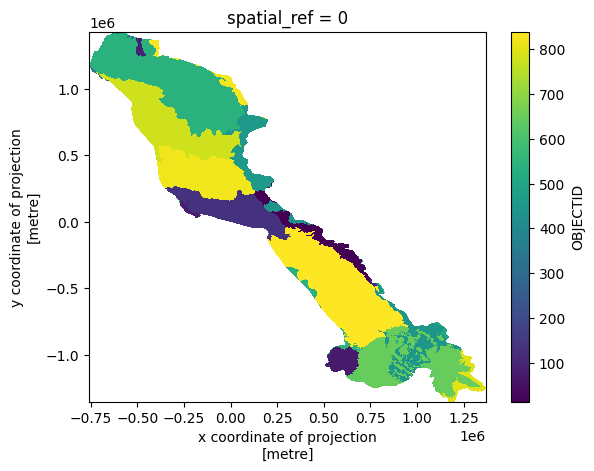

In [45]:
# plot the ecoregions
out_grid.OBJECTID.plot.imshow()

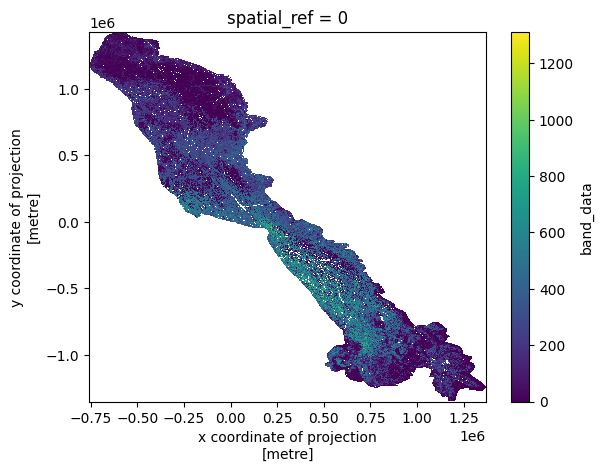

In [46]:
# plot the agb
out_grid.agb_t.plot()

In [48]:
# get agb stats by ecoregion
# group data by ecoregion
grouped_eco = out_grid.drop_vars('spatial_ref').groupby(out_grid.OBJECTID)

In [49]:
# calculate total agb
grid_sum = grouped_eco.sum().rename({'agb_t': 'agb_total_carbon'})

/Users/bermane/Team Braintree Dropbox/Ethan Berman/Python Projects/y2y-carbon/.venv/lib/python3.12/site-packages/xarray/core/concat.py:540: UserWarning: No index created for dimension OBJECTID because variable OBJECTID is not a coordinate. To create an index for OBJECTID, please first call `.set_coords('OBJECTID')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


In [51]:
zonal_stats = xarray.merge([grid_sum]).to_dataframe()
zonal_stats

,,agb_total_carbon
OBJECTID,band,
13.0,0,2.433837e+08
74.0,0,1.004933e+08
83.0,0,3.579388e+07
84.0,0,3.350862e+06
95.0,0,2.831050e+06
133.0,0,6.156989e+08
272.0,0,6.295988e+04
337.0,0,4.019129e+05
339.0,0,2.533857e+06


In [53]:
zonal_stats['agb_total_carbon'].sum() / 1e+09

np.float64(4.795529070312132)